In [1]:
#Analysis libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import seaborn as sns
plt.style.use("ggplot")


Data check


In [2]:
#Download data
df = pd.read_csv("Clean_Dataset.csv")

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [5]:
df.shape

(300153, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [7]:
df["airline"].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [8]:
df["source_city"].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [9]:
df["departure_time"].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [10]:
df["arrival_time"].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [11]:
df["class"].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [12]:
df["destination_city"].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

Data preprocessing

In [13]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [14]:
df.duplicated().sum()

0

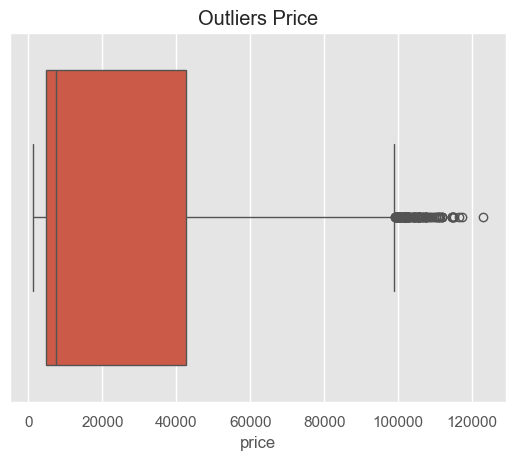

In [15]:
# to see the outliers
sns.boxplot(x=df["price"])
plt.title("Outliers Price")
plt.show()

In [16]:
# Calculate the allowed price range using IQR

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[ (df["price"] >= lower_bound) & (df["price"] <= upper_bound)]

print("Data sebelum menghapus outliers", len(df))
print("Data setelah menghapus outliers", len(df_cleaned))


Data sebelum menghapus outliers 300153
Data setelah menghapus outliers 300030


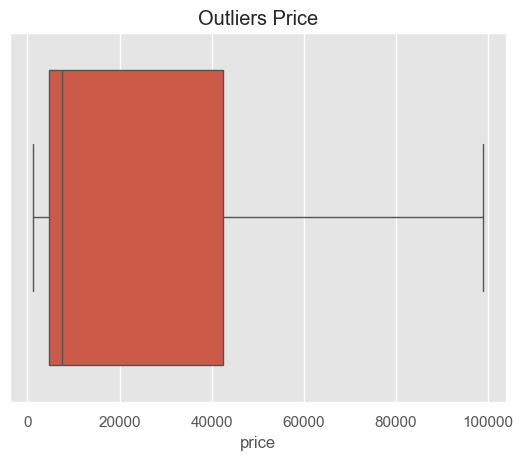

In [17]:
sns.boxplot(x=df_cleaned["price"])
plt.title("Outliers Price")
plt.show()

In [18]:
selected_columns = ['airline', 'flight', 'source_city', 'departure_time', 'stops' , 'arrival_time','destination_city','class', 'price']

df_cleaned = df_cleaned[selected_columns]

df_cleaned.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,5955


In [ ]:
#Column is not important
df_cleaned = df_cleaned.drop(["flight"],axis=1)

In [20]:
df_cleaned.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'price'],
      dtype='object')

In [21]:
# Convert text values to separate binary columns using One-Hot Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_cleaned["airline"] = le.fit_transform(df_cleaned["airline"])
df_cleaned["source_city"] = le.fit_transform(df_cleaned["source_city"])
df_cleaned["departure_time"] = le.fit_transform(df_cleaned["departure_time"]) 
df_cleaned["stops"] = le.fit_transform(df_cleaned["stops"])
df_cleaned["arrival_time"] =  le.fit_transform(df_cleaned["arrival_time"])
df_cleaned["class"] = le.fit_transform(df_cleaned["class"])
df_cleaned["destination_city"] = le.fit_transform(df_cleaned["destination_city"]) 
 

In [22]:
df_cleaned.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,price
0,4,2,2,2,5,5,1,5953
1,4,2,1,2,4,5,1,5953
2,0,2,1,2,1,5,1,5956
3,5,2,4,2,0,5,1,5955
4,5,2,4,2,4,5,1,5955
